In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
! pip install chart_studio





Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 2.2 MB/s eta 0:00:00


In [ ]:
! pip install bqplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 25.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 72.7 MB/s eta 0:00:00


In [ ]:
! pip install pingouin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7029 sha256=9dfc15215d5747ade107e800af9f10d72b99a0e0075488831228253b38bf9cda
  Stored in directory: /root/.cache/pip/wheels/3d/fe/b0/27a9892da57472e538c7452a721a9cf463cc03cf7379889266
Successfully built littleutils


In [ ]:
import pandas                   as pd
from scipy import stats
import numpy                    as np
import matplotlib.pyplot        as plt
import seaborn                  as sns

import statsmodels.formula.api  as sm
import chart_studio.plotly     as py

In [ ]:
Data = pd.read_excel('/content/gdrive/MyDrive/Datasets/Base de datos Semilla - Publica.xlsx')

In [ ]:
Data.head()

,Año de aprobación,Programa,Sector económico,Tipo postulante,País procedencia emprendimiento,Region procedencia emprendimiento,Región,Monto financiamiento aprobado,Número de integrantes,Género del integrante 1 del equipo,...,Impacto social emprendimiento 2021,Dimensiones impacto social emprendimiento 2021,Impacto social emprendimiento 2022,Dimensiones impacto social emprendimiento 2022,Sobrevivencia 2017,Sobrevivencia 2018,Sobrevivencia 2019,Sobrevivencia 2020,Sobrevivencia 2021,Sobrevivencia 2022
0,2001,Capital Semilla,No definido,Persona jurídica,Chile,Región Metropolitana,Región Metropolitana,35000000.0,1.0,Hombre,...,Sí,Capital Social,NaN,NaN,No,No,No,No,No,No
1,2001,Capital Semilla,No definido,Persona jurídica,Chile,Región Metropolitana,Región Metropolitana,33000000.0,1.0,Hombre,...,NaN,NaN,NaN,NaN,Si,Si,Si,Si,Si,Si
2,2001,Capital Semilla,No definido,Persona jurídica,Chile,Región Metropolitana,Región Metropolitana,35000000.0,1.0,Hombre,...,NaN,NaN,NaN,NaN,No,No,No,No,No,No
3,2001,Capital Semilla,No definido,Persona jurídica,Chile,Región Metropolitana,Región Metropolitana,35000000.0,1.0,Hombre,...,NaN,NaN,NaN,NaN,No,No,No,No,No,No
4,2001,Capital Semilla,No definido,Persona jurídica,Chile,Región Metropolitana,Región Metropolitana,8500000.0,1.0,Hombre,...,NaN,NaN,NaN,NaN,No,No,No,No,No,No


In [ ]:
Data.columns

Index(['Año de aprobación', 'Programa', 'Sector económico', 'Tipo postulante',
       'País procedencia emprendimiento', 'Region procedencia emprendimiento',
       'Región', 'Monto financiamiento aprobado', 'Número de integrantes',
       'Género del integrante 1 del equipo',
       ...
       'Impacto social emprendimiento 2021',
       'Dimensiones impacto social emprendimiento 2021',
       'Impacto social emprendimiento 2022',
       'Dimensiones impacto social emprendimiento 2022', 'Sobrevivencia 2017',
       'Sobrevivencia 2018', 'Sobrevivencia 2019', 'Sobrevivencia 2020',
       'Sobrevivencia 2021', 'Sobrevivencia 2022'],
      dtype='object', length=186)

La base que estamos observando es de una institucion llamada CORFO del gobierno de Chile la cual entre muchas otras funciones se encarga de lanzar programas de apoyo economico a micro, pequeñas y medianas empresas a traves de fondos concursables.

La base muestra alrededor de 186 variables, las cuales una gran parte son booleanas que sirven para hacer un seguimiento de los participantes a estos fondos concursables a lo largo del tiempo, desde el año 2001

Preguntas interesantes respecto son:



*   ¿ Existe relación entre mayor monto de financiamiento y el sexo del integrante 1 del equipo? "El integrante 1 del equipo es el fundador de la empresa"

*   ¿Existe relación entre la magnitud del financiamiento y la sobrevivencia del negocio?

*   ¿Existe relación entre el tamaño del equipo y la magnitud del financiamiento?

*   ¿Existe relación entre el tamaño del equipo y la sobrevivencia del negocio?

*   ¿Cómo se concentran los montos de financiamiento a nivel de regiones?

*   ¿Hay relación entre la region de procedencia del emprendimiento y la region donde se postula?

*   ¿Cómo ha evolucionado el numero de aprobaciones con impacto social en el tiempo?








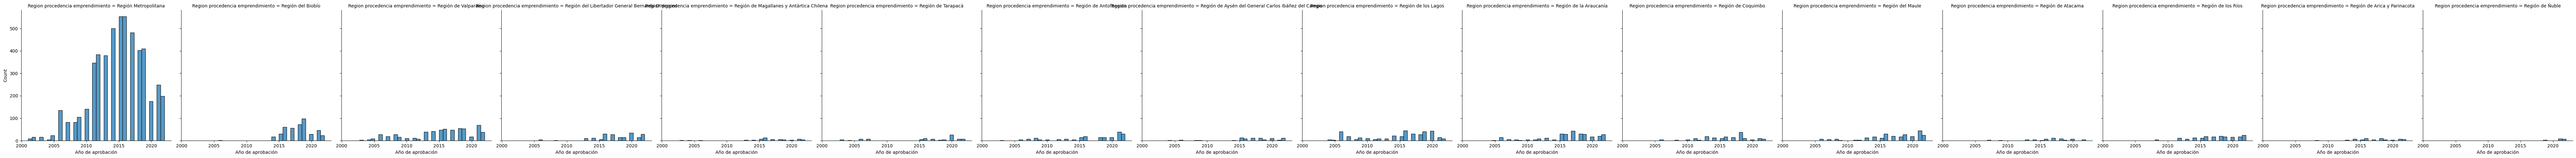

In [ ]:
sns.displot( data=Data, x='Año de aprobación', col='Region procedencia emprendimiento' )